# AOS_quickbackground

Pulling parts of `AOS_PS1_simulate`, to figure out how much background is added by quickbackground. 

First plot raw and postISR  `backgroundmode 0` , then for `quickbackground`, finally compare the two. 

Steps followed to simulate the images:

--> Copied locations of comcam arrows and removed all but first 11 stars:

       cp /project/scichris/aos/images/lsstCam/starExtra.inst  /project/scichris/aos/ps1_phosim/testBkgnd/
       
--> Run phosim without background for LsstCam R22 :

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/testBkgnd/starSingle.inst -i lsst -e 1 -c /project/scichris/aos/ps1_phosim/noBkgnd.cmd -p 25 -o /project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/ > starPhoSim.log 2>&1
    
--> Run phosim with quick background for LsstCam R22 :

    python /project/scichris/aos/phosim_syseng4/phosim.py /project/scichris/aos/ps1_phosim/testBkgnd/starSingle.inst -i lsst -e 1 -c /project/scichris/aos/ps1_phosim/qckBkgnd.cmd -p 25 -o /project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/ > starPhoSim.log 2>&1
    
--> Repackage

    phosim_repackager.py /project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/ --out_dir /project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/repackaged/ --inst lsst

    phosim_repackager.py /project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/ --out_dir /project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/repackaged/ --inst lsst



In [2]:
import os 
from lsst.daf import butler as dafButler
import matplotlib.pyplot as plt
from matplotlib import rcParams 
from astropy.io import fits
from astropy.visualization import ZScaleInterval
zscale = ZScaleInterval()

rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

## `backgroundmode 0` : 

Raw image:

960.0 1049.0


Text(0.5, 1.0, 'LsstCam, R22_S00 (ITL), \n backgroundmode 0')

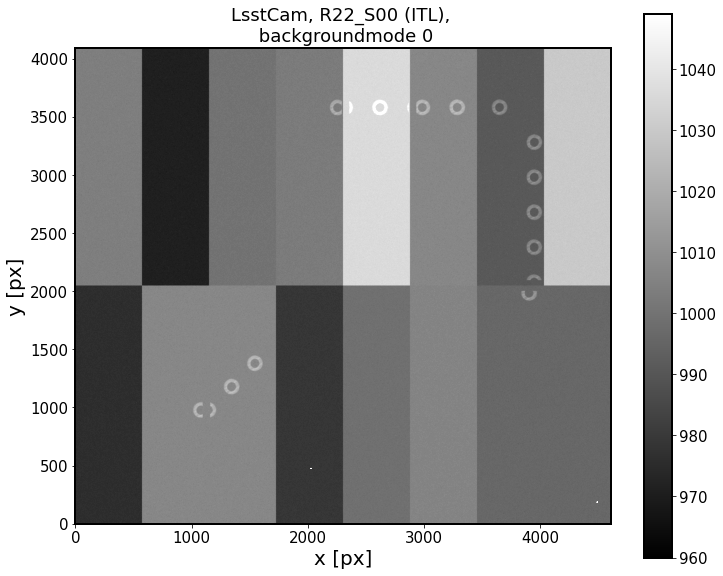

In [3]:
repo_name = 'DATA'
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/',repo_name)

butler = dafButler.Butler(repo_dir)

%matplotlib inline

exposure = butler.get('raw', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['LSSTCam/raw/all'])

data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)

fig = plt.figure(figsize=(12, 10))
plt.imshow(data, origin='lower', vmin=vmin,vmax=vmax,cmap='gray')
plt.colorbar()
plt.xlabel('x [px]')
plt.ylabel('y [px]')
detector  = exposure.getDetector()
plt.title(f'LsstCam, {detector.getName()} (ITL), \n backgroundmode 0')


postISR image:

-17.874466 29.086128


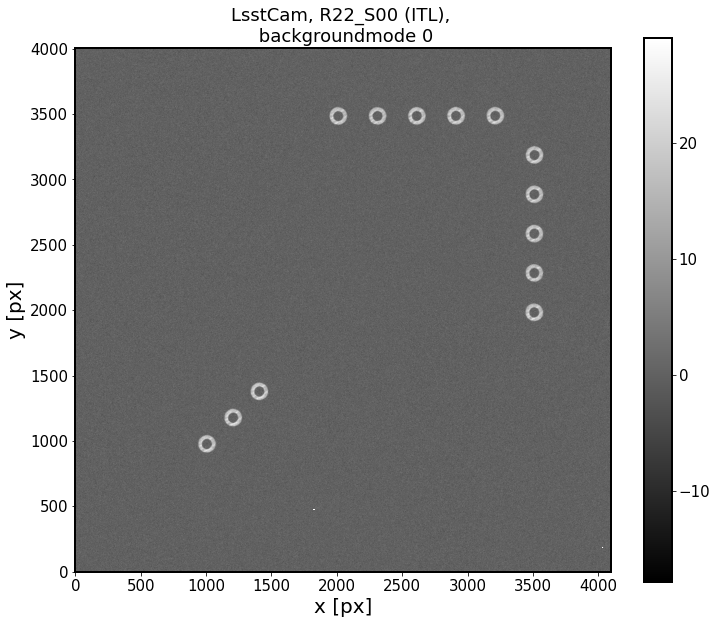

In [4]:
%matplotlib inline

exposure = butler.get('postISRCCD', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['run1'])
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)

fig = plt.figure(figsize=(12, 10))
plt.imshow(data, origin='lower', vmin=vmin,vmax=vmax,cmap='gray')
plt.colorbar()
plt.xlabel('x [px]')
plt.ylabel('y [px]')
detector  = exposure.getDetector()
plt.title(f'LsstCam, {detector.getName()} (ITL), \n backgroundmode 0')


## quickbackground

raw image

959.0 1072.0


Text(0.5, 1.0, 'LsstCam, R22_S00 (ITL), \nquickbackground')

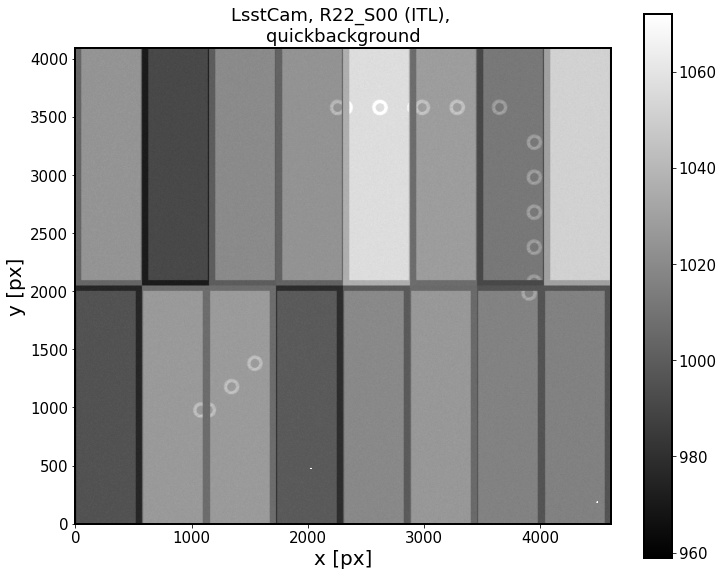

In [9]:
repo_name = 'DATA'
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/',repo_name)
butler = dafButler.Butler(repo_dir)

%matplotlib inline

exposure = butler.get('raw', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['LSSTCam/raw/all'])

data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)

fig = plt.figure(figsize=(12, 10))
plt.imshow(data, origin='lower', vmin=vmin,vmax=vmax,cmap='gray')
plt.colorbar()
plt.xlabel('x [px]')
plt.ylabel('y [px]')
detector  = exposure.getDetector()
plt.title(f'LsstCam, {detector.getName()} (ITL), \nquickbackground')


-7.9662666 60.39493


Text(0.5, 1.0, 'LsstCam, R22_S00 (ITL), \n quick background')

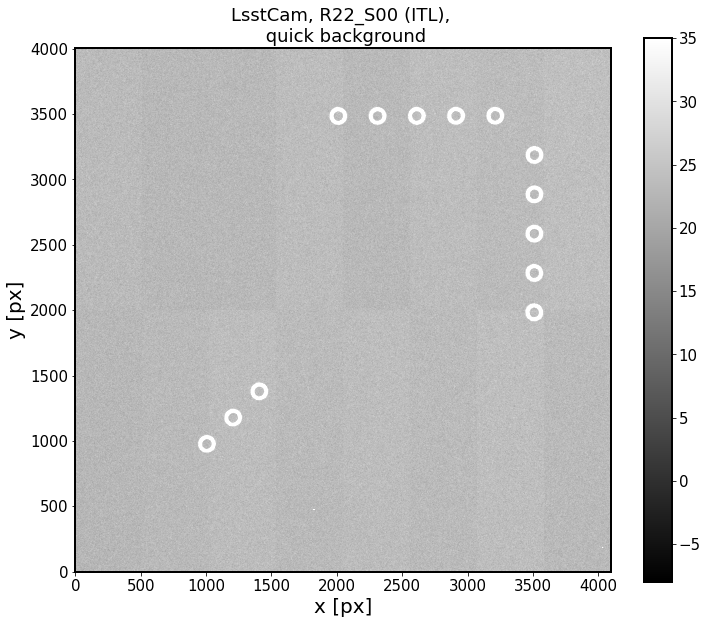

In [13]:
%matplotlib inline
repo_name = 'DATA'
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/',repo_name)

butler = dafButler.Butler(repo_dir)
exposure = butler.get('postISRCCD', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['run3'])
data = exposure.image.array
vmin, vmax = zscale.get_limits(data)
print(vmin,vmax)
fig = plt.figure(figsize=(12, 10))
plt.imshow(data, origin='lower', cmap='gray', vmin=vmin,vmax=35,)
plt.colorbar()
plt.xlabel('x [px]')
plt.ylabel('y [px]')
detector  = exposure.getDetector()
plt.title(f'LsstCam, {detector.getName()} (ITL), \n quick background')


## Compare background level in raw images

In [14]:
repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/noBkgnd/',repo_name)
butler = dafButler.Butler(repo_dir)
exposure = butler.get('raw', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['LSSTCam/raw/all'])

data = exposure.image.array


repo_dir = os.path.join('/project/scichris/aos/ps1_phosim/testBkgnd/qckBkgnd/',repo_name)
butler = dafButler.Butler(repo_dir)

%matplotlib inline

exposure = butler.get('raw', detector='R22_S00', instrument="LSSTCam",
          exposure=4000021706001,collections=['LSSTCam/raw/all'])

data1 = exposure.image.array

Compare the trace across multiple amps for `backgroundmode 0` vs `quickbackground` . The offset would correspond to the simulated background: 

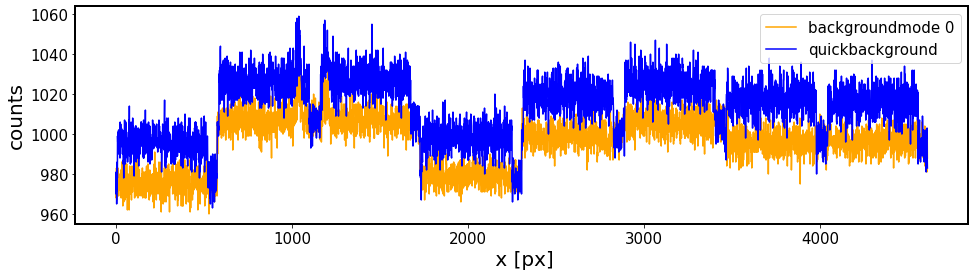

In [35]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(data[1000,:], c='orange', label='backgroundmode 0')
ax.plot(data1[1000,:], c='blue', label='quickbackground')
ax.set_xlabel(' x [px]')
ax.set_ylabel('counts')
ax.legend(fontsize=15)

Text(0.5, 1.0, '(quickbackground) - (backgroundmode 0), y=1000')

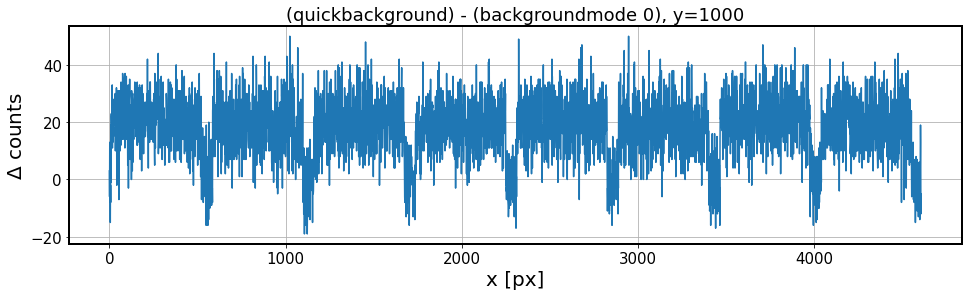

In [36]:
fig,ax = plt.subplots(1,1,figsize=(16,4))
ax.plot(data1[1000,:]-data[1000,:])
ax.grid()
ax.set_xlabel('x [px]')
ax.set_ylabel(r'$\Delta$ counts')
ax.set_title('(quickbackground) - (backgroundmode 0), y=1000')

So the added background corresponds to ~20 counts. In-between amps the level goes down to bias, which is the same (that's why it goes to 0).